In [1]:
# Next steps....need 93% accuracy
# 1. more eipcs
# 2. Longer classification head
# 3. 2 or 3 more convultional layers - image size, layers, 
# 4. Pre-process - 
# Setting up MNST, this should look familiar:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.utils import to_categorical

# For examining results
from sklearn.metrics import confusion_matrix
import seaborn as sn

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

Using TensorFlow backend.


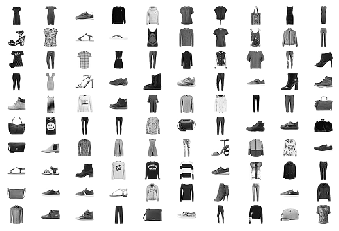

In [15]:
### Figure out how to manipulate the mnist_fashion image arrays.
#i = 0
#for i in test_images:
#    print(test_images[i])
#    plt.imshow(test_images[i])
#    plt.show(test_images[i])
#    i = i + 1
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(training_images[(i+50)], cmap='Greys')
    

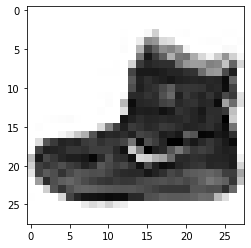

In [25]:
plt.imshow(training_images[0], cmap='Greys')

In [3]:
##First line from 03-Image Prerocessing
##Refer to 

#for name in os.listdir(photo_location):
for name in test_data:
    #if name.startswith('.'): continue 
    
    # Note the target_size parameter
    # image = load_maintain_aspect_ratio(photo_location + name, target_size=(28, 28))
    print(type(image))
    plt.imshow(image)
    plt.show()

NameError: name 'image' is not defined

In [ ]:
images = []
labels = np.array([0, 1, 2]) # This are required for flow, which we'll see soon.
for name in os.listdir(photo_location):
    if name.startswith('.'): continue 
    
    # Note the target_size parameter
    image = load_maintain_aspect_ratio(photo_location + name, target_size=(256, 256))
    images.append(image)
    
# Just prove to ourselves nothing has changed here:
images = np.array(images)
for im in images:
    plt.imshow(im)
    plt.show()

In [ ]:
conv_training_data = training_images.reshape(60000, 28, 28, 1)
conv_test_data = test_images.reshape(10000, 28, 28, 1)

In [ ]:
def plot_training_history(history, model, eval_images=False):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    if eval_images:
        loss, accuracy  = model.evaluate(conv_test_data, test_labels, verbose=False)
    else:
        loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
        
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [ ]:
# Added third layer to ANN head
model = Sequential()

# Note, fewer filters and a bigger kernel, plus a pooling layer
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Note, more filters and a pooling
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2 dense layers with dropout before the final.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(126, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

In [ ]:
# Lets visualize the first 100 images from the dataset
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(training_images[i], cmap='Greys')